In [1]:
import argparse
import train
%matplotlib inline

#### Choices of window size

| Groups | Window_Size |
|--|--|
| Dynamic | 200 |
| Agree | 100 |
| Static | 5 |

## Get training misclassified indices for static model

In [2]:
parser = argparse.ArgumentParser(description='Machine learning method on classification of human activities from skeleton data')

###### datasets parameters ######
parser.add_argument('--exp_group',type=str,default='Dynamic',
                choices=['Dynamic','Agree','Static'],
                help='Select one group of training & testing')
parser.add_argument('--train_split_method_paths', type=list, help='paths of split methods for trainset')
parser.add_argument('--trainset_paths', type=list, help='paths of data for trainset')
parser.add_argument('--test_split_method_paths', type=list, help='paths of split methods for testset')
parser.add_argument('--testset_paths', type=list, help='paths of data for testset')

###### training configuration ######
parser.add_argument('--desired_features',type=str,default='dataset/desired_features.yaml',help='load features name from .yaml')
parser.add_argument('--split_ratio', type=float, default=0.9, help='the ratio for number of samples in trainset')
parser.add_argument('--window_size', type=int, default=200, help='the ratio for number of samples in trainset')
parser.add_argument('--outside_test',type=int,default=1,help='1: use extra testset; 0: extract testset from trainset')
parser.add_argument('--save_res',type=int,default=1,help='True: save plot; False: show plot')
parser.add_argument('--standard', type=str, default='no_scale',
                        choices={'len_spine','height','no_scale'},
                        help='standarize with which scaling factor')

###### models configuration ######
# select a model
parser.add_argument('--model', type=str, default='RandomForest', choices=['KNN','RandomForest','SVM'])
# for KNN
parser.add_argument('--n_neighbor', type=int, default=20, help='number of neighbours, only for KNN')
# for RandomForest
parser.add_argument('--max_depth', type=int, default=6, help='max depth for random forest')
parser.add_argument('--random_state', type=int, default=0, help='random state for random forest')

args = parser.parse_args([])

coords shape: (7800, 3, 26)
cog shape: (7800, 1, 3)
------------------------------------------------------------------
selected scaling factor is: no_scale = 1.0
------------------------------------------------------------------
coords shape: (7670, 3, 26)
cog shape: (7670, 1, 3)
------------------------------------------------------------------
selected scaling factor is: no_scale = 1.0
------------------------------------------------------------------
coords shape: (11739, 3, 26)
cog shape: (11739, 1, 3)
------------------------------------------------------------------
selected scaling factor is: no_scale = 1.0
------------------------------------------------------------------
original x_data shape: (27059, 92)
original y_data shape: (27059,)

x_data with window has shape: (25059, 200, 92)
y_data with window has shape: (25059,)

x_data with window features has shape: (25059, 644)
y_data with window features has shape: (25059,)

coords shape: (4802, 3, 26)
cog shape: (4802, 1, 3)
---

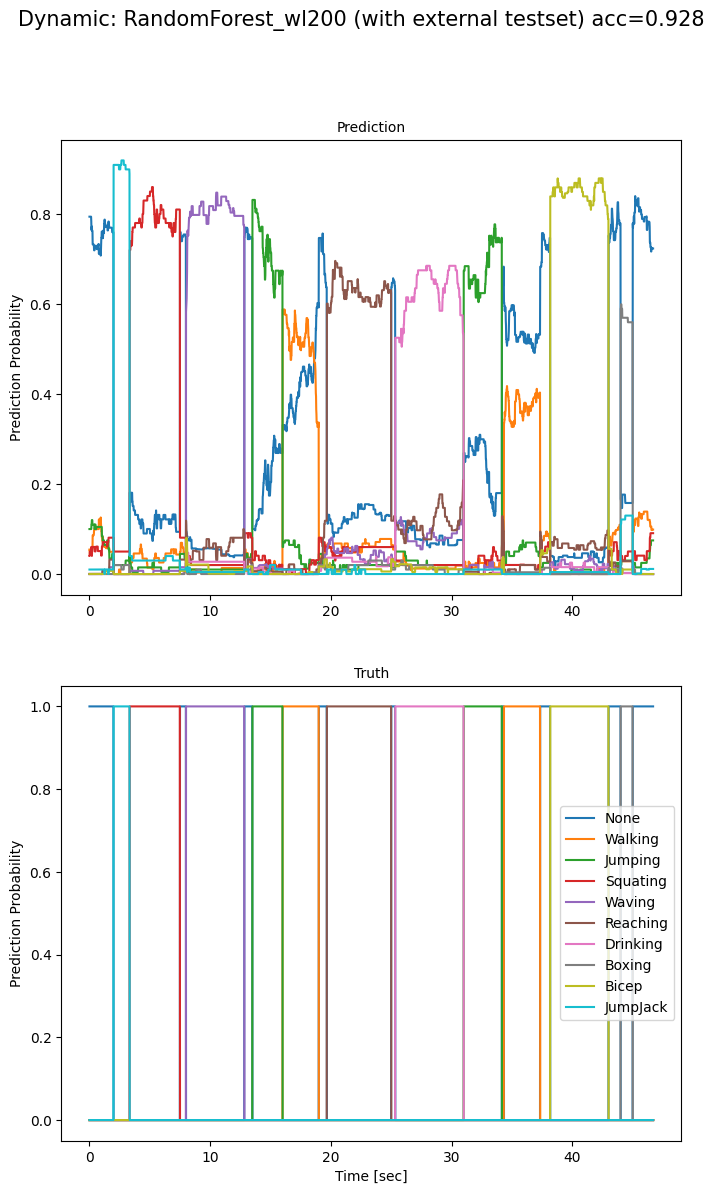

In [3]:
# train model
cls_model = train.main(ext_args=args)

In [4]:
# get misclassified index
cls_model.misclass_index()

The misclassified windows has shape: (203, 2)
Examine the windows with these indices in data_visualization.py:
idx of misclassified window | check on dataset with:[start_frame, end_frame] | truth | prediction
1117 | [2589 2789] | 1 | 0
1118 | [2590 2790] | 1 | 0
1119 | [2591 2791] | 1 | 0
1120 | [2592 2792] | 1 | 0
1121 | [2593 2793] | 1 | 0
1122 | [2594 2794] | 1 | 0
1123 | [2595 2795] | 1 | 0
1124 | [2596 2796] | 1 | 0
1125 | [2597 2797] | 1 | 0
1126 | [2598 2798] | 1 | 0
1127 | [2599 2799] | 1 | 0
1128 | [2600 2800] | 1 | 0
1129 | [2601 2801] | 1 | 0
1130 | [2602 2802] | 1 | 0
1131 | [2603 2803] | 1 | 0
1132 | [2604 2804] | 1 | 0
1133 | [2605 2805] | 1 | 0
1134 | [2606 2806] | 1 | 0
1135 | [2607 2807] | 1 | 0
1136 | [2608 2808] | 1 | 0
1137 | [2609 2809] | 1 | 0
1138 | [2610 2810] | 1 | 0
1139 | [2611 2811] | 1 | 0
2060 | [2612 2812] | 1 | 0
2061 | [2613 2813] | 1 | 0
2062 | [2614 2814] | 1 | 0
2063 | [2615 2815] | 1 | 0
2064 | [2616 2816] | 1 | 0
2065 | [2617 2817] | 1 | 0
2066 | [